<a href="https://colab.research.google.com/github/collinscolour/GoMyCodeCheckPoint/blob/main/UnsupervisedLearningClustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link


Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user
Instructions
Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

In [1]:
import pandas as pd

data = pd.read_csv("Credit_card_dataset.csv")

print(data.head())
print(data.describe())

print(data.isnull().sum())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361.280000    856.90154

In [2]:
data.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[["PURCHASES", "CREDIT_LIMIT"]])

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["CUST_ID"] = encoder.fit_transform(data["CUST_ID"])

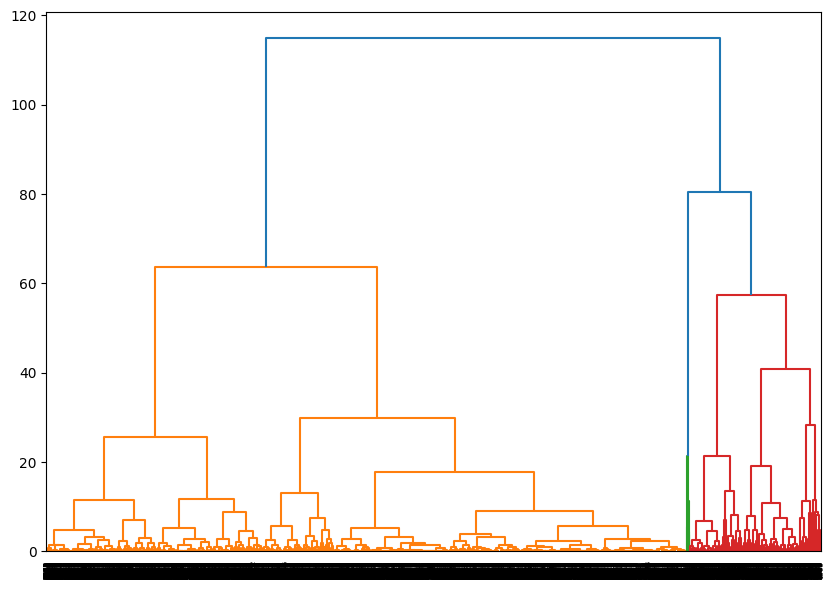

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage matrix
linked = linkage(scaled_features, method="ward")

# Dendrogram visualization
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

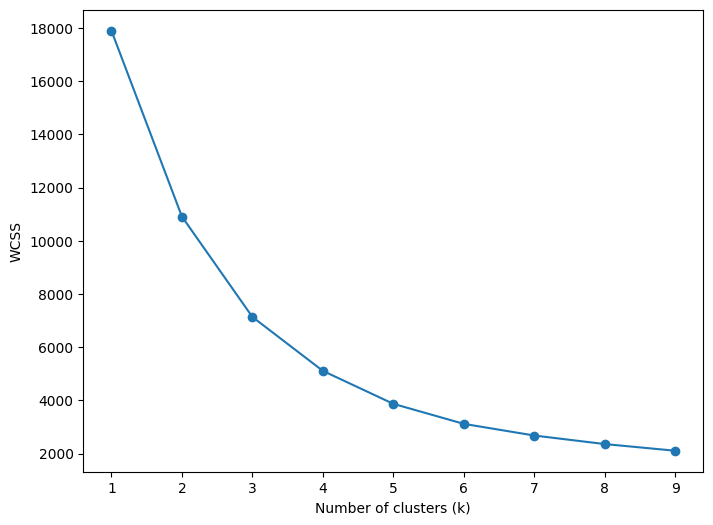

In [4]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
k_range = range(1, 10)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


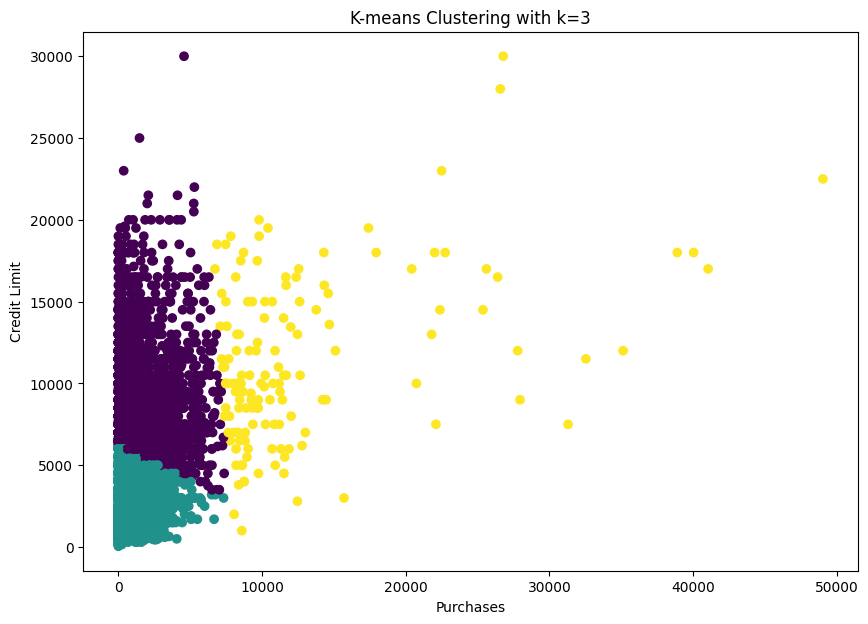

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)

# Add cluster labels to the data
data["cluster"] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    data["PURCHASES"], data["CREDIT_LIMIT"], c=data["cluster"], cmap="viridis"
)
plt.xlabel("Purchases")
plt.ylabel("Credit Limit")
plt.title("K-means Clustering with k=3")
plt.show()

The dendrogram shows several potential cluster formations with different levels of granularity.
Identifying the optimal number of clusters requires further analysis and business considerations.*italicized text*